# Car Sales Forecasting

A Practice on the vanilla Time-Series concepts.

In [51]:
import datetime
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

We will use a parser for date conversion

In [52]:
def parser(x):
    return datetime.strptime(x, '%Y-%m')

In [53]:
#We can also do that manually
# sales['Month'] = pd.to_datetime(sales['Month'])

In [54]:
sales = pd.read_csv('sales-cars.csv', parse_dates= ['Month'], date_parser= parser, index_col= ['Month'])
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [55]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2016-01-01 to 2018-12-01
Data columns (total 1 columns):
Sales    36 non-null int64
dtypes: int64(1)
memory usage: 576.0 bytes


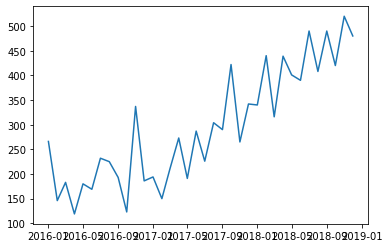

In [56]:
plt.plot(sales)
plt.show()

It is obvious that there is no stationarity in the data. But we can also verify it using Autocorrelation plot.

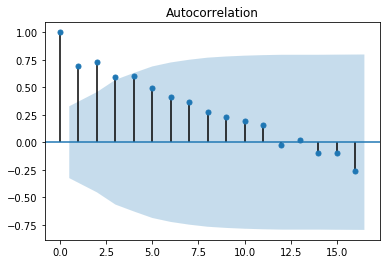

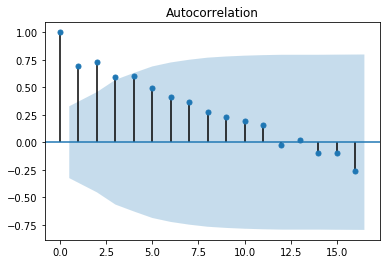

In [57]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

The gradual decrease shows that there is no stationarity which simply means there are varying mean, variance and covariance.

#### Converting Series into Stationary

In [58]:
sales_diff = sales.diff(periods =1)
sales_diff.head(10)

,Sales
Month,
2016-01-01,NaN
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0
2016-07-01,63.0
2016-08-01,-7.0
2016-09-01,-32.0


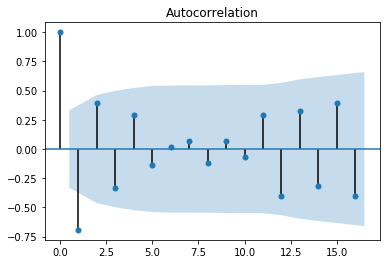

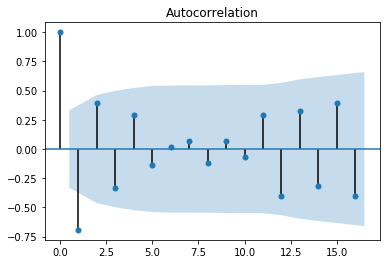

In [59]:
# We'll drop the very first observation
sales_diff = sales_diff[1:]
plot_acf(sales_diff)

We can clearly see that there is stationarity.

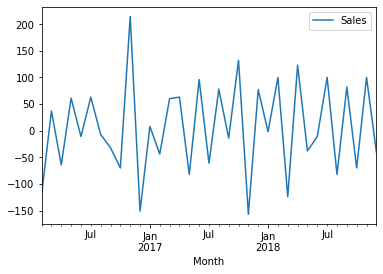

In [60]:
sales_diff.plot()
plt.show()

### Splitting the test and train dataset

In [112]:
sales.size

36

In [127]:
train = sales[:27]
test = sales[27:]
print(train.size, test.size)

27 9


In [128]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [129]:
predictions = model_ar_fit.predict(start= 26, end = 36)

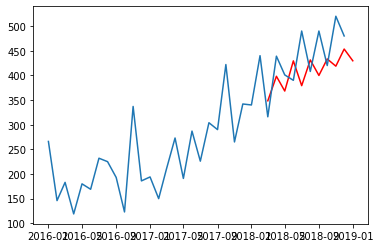

In [130]:
# plt.plot(test, c = 'g')
plt.plot(predictions, c = 'r')
plt.plot(sales)
plt.show()

### ARIMA Model

In [131]:
from statsmodels.tsa.arima_model import ARIMA

In [160]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train, order = (9,2,0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

297.16198465489026


In [161]:
predictions = model_arima_fit.forecast(steps = 10)[0]
predictions

array([396.03509747, 355.95199362, 413.07633885, 374.50710102,
       446.92268059, 378.62486615, 406.33611371, 411.37459508,
       475.86335339, 415.37357999])

In [162]:
predictions

array([396.03509747, 355.95199362, 413.07633885, 374.50710102,
       446.92268059, 378.62486615, 406.33611371, 411.37459508,
       475.86335339, 415.37357999])

In [170]:
test['Sales'].to_numpy()

array([439, 401, 390, 490, 408, 490, 420, 520, 480])

In [153]:
# plt.plot(test, c = 'g')
plt.plot(predictions, c = 'r')
plt.plot(test['Sales'])
plt.show()

ValueError: view limit minimum -36851.450000000004 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [142]:
import itertools
p=d=q = range(0,5)
pdq = list(itertools.product(p,d,q))
pdq[:10]

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4)]

In [151]:
min_aic = 1000
for param in pdq:
    try:
        model_arima = ARIMA(train, order = param)
        model_arima_fit = model_arima.fit()
#         print(param, model_arima_fit.aic)
        if model_arima_fit.aic < min_aic:
            print(param, model_arima_fit.aic)
            min_aic = model_arima_fit.aic
    except:
        continue

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.7244809384947
(0, 0, 2) 315.25060028714074
(0, 0, 4) 310.1669328577808
(0, 1, 1) 296.0841530678005
(3, 1, 0) 294.8543584219496
(3, 1, 2) 292.6686238694026
(4, 2, 1) 291.3991344718396


In [ ]:
We can use 4,2,1 as thhe pdq values